In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv(r"D:\ex2data2.txt",names=["Test 1","Test 2","Accepted"])
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


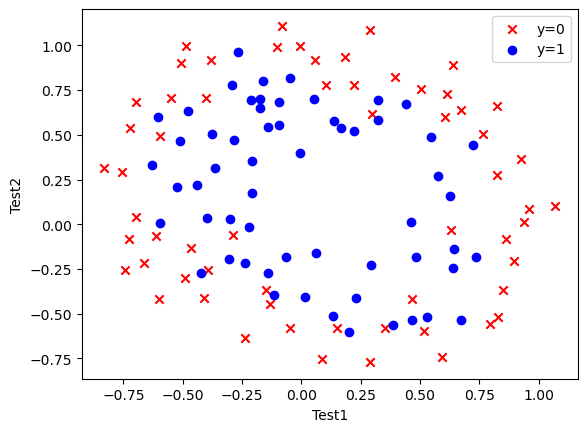

In [9]:
fig,ax=plt.subplots()
ax.scatter(data[data["Accepted"]==0]["Test 1"],data[data["Accepted"]==0]["Test 2"],c="r",marker="x",label="y=0")
ax.scatter(data[data["Accepted"]==1]["Test 1"],data[data["Accepted"]==1]["Test 2"],c="b",marker="o",label="y=1")
ax.legend()
ax.set(xlabel="Test1",
       ylabel="Test2")
plt.show()

In [11]:
# 特征映射
def feature_mapping(x1,x2,power):
    data={}
    for i in np.arange(power+1):
        for j in np.arange(i+1):
            data["F{}{}".format(i-j,j)]=np.power(x1,i-j)*np.power(x2,j)
    return pd.DataFrame(data)

In [13]:
x1=data["Test 1"]
x2=data["Test 2"]

In [15]:
data2=feature_mapping(x1,x2,6)

In [17]:
data2.head()

,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [184]:
# 构造数据集

In [19]:
X=data2.values

In [21]:
X.shape

(118, 28)

In [23]:
y=data.iloc[:,-1].values

In [25]:
y=y.reshape(len(y),1)
y.shape

(118, 1)

In [27]:
# 损失函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [29]:
def costFunction(X,y,theta,lamda):
    A=sigmoid(X@theta)
    first=y*np.log(A)
    second=(1-y)*np.log(1-A)
    reg=np.sum(np.power(theta[1:],2))*(lamda/(2*len(X)))
    return -np.sum(first+second)/len(X)+reg

In [31]:
theta=np.zeros((28,1))
theta.shape

(28, 1)

In [33]:
lamda=1
cost_init=costFunction(X,y,theta,lamda)
print(cost_init)

0.6931471805599454


In [35]:
# 梯度下降函数
def gradientDescent(X,y,theta,alpha,iters,lamda):
    costs=[]
    for i in range(iters):
        reg=theta[1:]*(lamda/len(X))
        reg=np.insert(reg,0,values=0,axis=0)
        theta=theta-(X.T@(sigmoid(X@theta)-y))*alpha/len(X)-reg*alpha
        cost=costFunction(X,y,theta,lamda)
        costs.append(cost)
        if i%1000==0:
            print(cost)
    return theta,costs

In [37]:
alpha=0.001
iters=200000
lamda=0.001

In [39]:
theta_final,costs=gradientDescent(X,y,theta,alpha,iters,lamda)

0.693134380798985
0.6818207729778132
0.6725974534826156
0.6646386240403803
0.6575093538238375
0.6509718395182029
0.6448884710940886
0.6391737353688466
0.6337702418573659
0.6286366014804017
0.6237411486351028
0.6190585708214384
0.6145680074385785
0.6102519084447487
0.6060952995813559
0.6020852755591007
0.5982106289182401
0.5944615653289776
0.5908294778704326
0.5873067640636911
0.5838866754107954
0.5805631925079233
0.5773309207469289
0.5741850028389882
0.5711210452127979
0.5681350559248263
0.5652233921588475
0.5623827157348078
0.5596099553210291
0.5569022742661284
0.5542570431493506
0.5516718162983197
0.5491443116476307
0.5466723934148944
0.5442540571565863
0.5418874168373466
0.5395706936057472
0.5373022060189993
0.5350803615003243
0.5329036488471296
0.5307706316368961
0.5286799424017219
0.5266302774625866
0.5246203923312629
0.5226490976019255
0.5207152552663786
0.5188177753967816
0.5169556131481401
0.5151277660398906
0.5133332714818488
0.5115712045148234
0.5098406757404326
0.50814082941

In [41]:
def predict(X,theta):
    prob=sigmoid(X@theta)
    return [1 if x>=0.5 else 0 for x in prob]

In [43]:
y_=np.array(predict(X,theta_final))
y_pre=y_.reshape(len(y_),1)
acc=np.mean(y_pre==y)
print(acc)

0.8135593220338984


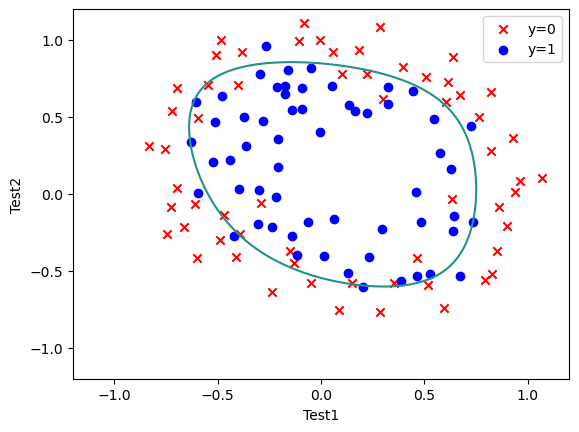

In [45]:
x=np.linspace(-1.2,1.2,200)
xx,yy=np.meshgrid(x,x)
z=feature_mapping(xx.ravel(),yy.ravel(),6).values
zz=z@theta_final
zz=zz.reshape(xx.shape)
fig,ax=plt.subplots()
ax.scatter(data[data["Accepted"]==0]["Test 1"],data[data["Accepted"]==0]["Test 2"],c="r",marker="x",label="y=0")
ax.scatter(data[data["Accepted"]==1]["Test 1"],data[data["Accepted"]==1]["Test 2"],c="b",marker="o",label="y=1")
ax.legend()
ax.set(xlabel="Test1",
       ylabel="Test2")
plt.contour(xx,yy,zz,0)
plt.show()